Código de María Luz Martinez Ricci  
20211015

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5');

m_a=1 #kg
m_b=1 #kg
lo=3 #m
a=4 #m
k=15 #N/m
k1=k*(1-lo/a) #N/m
N=20
M=np.zeros((N,N),dtype=float) #Generamos la matriz 0 de NxN
#Primero asignamos la diagonal principal
for i in range(N):
  if i%2==0:      #Normalmente, el numero i par nos daria a m_b, pero como phyton trabaja empezando de i=0, simplemente lo damos vuelta y nos queda como queremos. Esto se usa para las tres diagonales.
    M[i,i]=2*k1/(m_a)
  else:
    M[i,i]=2*k1/(m_b)
#Ahora asignamos los numeros de la diagonal superior a la principal(La que corresponde a los Mi,i+1)
for i in range(N-1):
  if i%2==0: 
    M[i,i+1]=-k1/m_a
  else:
    M[i,i+1]=-k1/m_b
#Ahora realizamos el mismo procedimiento para la diagonal inferior a la principal(Mi,i-1)
for i in range(1,N):
  if i%2==0: 
    M[i,i-1]=-k1/m_a
  else:
    M[i,i-1]=-k1/m_b
    
print("La matriz M es")
print(M)



omega, v=np.linalg.eig(M) #Comando que calcula los autovalores y autovectores. Asigna omega a los autovalores, v a los autovectores.
freq=np.sqrt(omega) #Definimos las frecuencias.
autob10=np.around(10*v,2) #Multiplicamos los autovectores por 10, y redondeamos a 2 decimales.


idx=(-freq).argsort()[::-1]   #Ordenamos a freq de menor a mayor
Freq=freq[idx] #Definimos a Freq como las frecuencias, ordenadas de menor a mayor. A partir de ahora usamos esta variable.
AUTOb10=autob10[:,idx] #Definimos a AUTOb10 para que se corresponda con Freq. A partir de ahora usamos esta variable.
print("Las frecuencias ordenadas son ")
print(Freq)
print("Los autovectores ordenados son")
print(AUTOb10)

La matriz M es
[[ 7.5  -3.75  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-3.75  7.5  -3.75  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -3.75  7.5  -3.75  0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   -3.75  7.5  -3.75  0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -3.75  7.5  -3.75  0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -3.75  7.5  -3.75  0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   -3.75  7.5  -3.75  0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -3.75  7.5  -3.75  0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.  ]
 

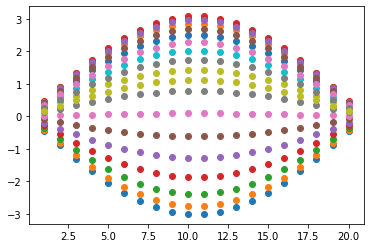

In [3]:
p=1
x = np.linspace(1, N, N)
t = np.linspace(0, 15, 20)
X2, T2 = np.meshgrid(x, t)

F=AUTOb10[:,p-1]*np.cos(Freq[p-1]*T2)

for n in range(1,N):
  plt.scatter(X2[0,:],F[n,:])

In [4]:
modo = 0 # fundamental
def apartamientos(modo, t):
  return AUTOb10[:,modo]* np.cos(Freq[modo]* t)

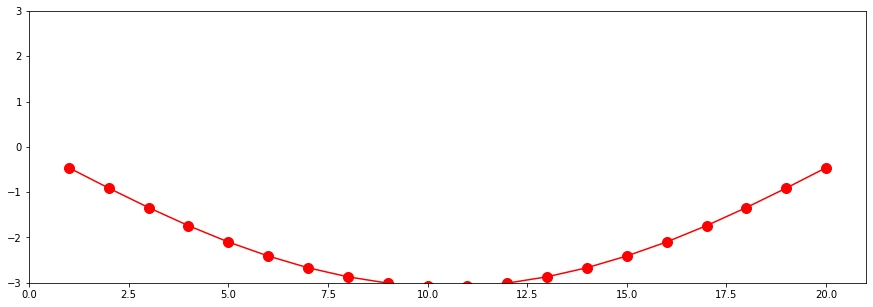

In [22]:
figura, ax = plt.subplots(figsize=(15, 5))
ax.set(xlim=(0, 21), ylim=(-3, 3))
line, = ax.plot([], [],'o-', ms = 10, color = 'r')
def init(): 
    line.set_data([], []) 
    return line,
cuadros = 150
fraccT = (2* np.pi/Freq[0])/ cuadros # para recorrer un período del fundamental
def animate(i):
  line.set_data(x, apartamientos(modo, fraccT* i) )
  return line,
anim = animation.FuncAnimation(figura, animate, init_func= init, interval=50, frames=cuadros, blit=True)
anim